# Task 2

In [5]:
from vector_fields import *
from function_approximation import *
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import numpy as np
import math

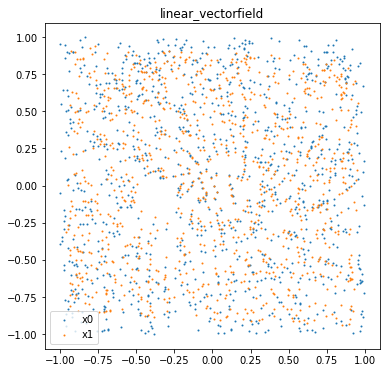

In [6]:
# read the vector field data
x0, x1 = read_vectorfield_data(base_filename="linear_vectorfield_data")
fig, ax = plt.subplots(1,1,figsize=(6,6))
ax.scatter(x0[:,0], x0[:,1], s=1, label='x0')
ax.scatter(x1[:,0], x1[:,1], s=1, label='x1')
ax.set_title("linear_vectorfield")
plt.legend()
plt.show()

Try to estimate a linear operator A for the linear vector fields with unknown deltaT

In [7]:
# search for best delta_t (the one giving lowest mse)
attempts = []
for dt in np.linspace(0.0001, 0.5, 500):
    v = estimate_vectors(dt, x0, x1)
    A, _, _, _ = approx_lin_func(data=(x0,v))    
    x1_pred, _, _ = solve_trajectory(x0, x1, linear_approx, args=[A], plot=False)
    attempts.append([dt, np.linalg.norm(x1_pred-x1)**2 / x1.shape[0]])
    print(f"attempting with {attempts[-1][0]} got mse: {attempts[-1][1]}")

attempting with 0.0001 got mse: 0.5837770188446816
attempting with 0.0011018036072144289 got mse: 0.5847280387735483
attempting with 0.0021036072144288574 got mse: 0.5693898618141339
attempting with 0.0031054108216432862 got mse: 0.5119077529872891
attempting with 0.0041072144288577155 got mse: 0.4412437282609119
attempting with 0.005109018036072144 got mse: 0.37499507935855564
attempting with 0.006110821643286573 got mse: 0.3181653889555301
attempting with 0.007112625250501002 got mse: 0.2709491989718904
attempting with 0.00811442885771543 got mse: 0.23210728025109612
attempting with 0.009116232464929859 got mse: 0.20016025548914096
attempting with 0.010118036072144287 got mse: 0.1737767574174174
attempting with 0.011119839679358716 got mse: 0.1518562835182706
attempting with 0.012121643286573145 got mse: 0.13351957051006985
attempting with 0.013123446893787574 got mse: 0.1180732778826174
attempting with 0.014125250501002003 got mse: 0.10497230563887684
attempting with 0.0151270541082

Compute the mean squared error to all the known points, given the calculated A

Residual error: [1.13769605e-12 3.98708288e-12]


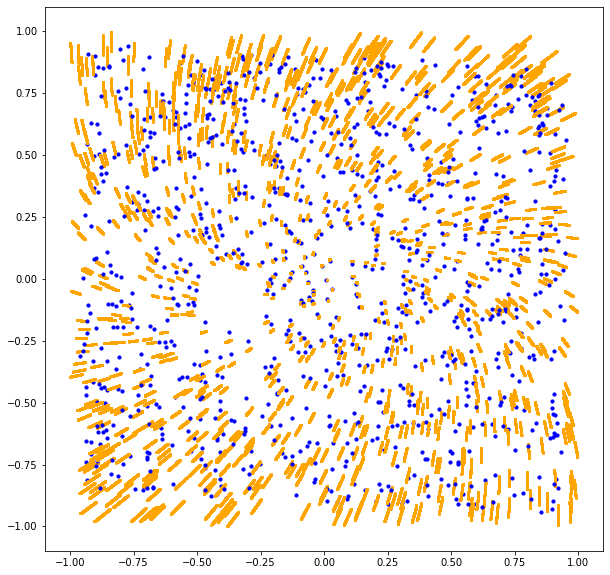

MSE value is: 0.0026804055616739047


In [9]:
# utilize delta_t for minimum mse, plot results
plt.rcParams["figure.figsize"] = (10,10)
v = estimate_vectors(0.1433579158316633, x0, x1)
A, res, _, _ = approx_lin_func(data=(x0,v))
print("Residual error:",res)
x1_pred, _, _ = solve_trajectory(x0, x1, linear_approx, end_time=0.1, args=[A], plot=True)
print("MSE value is:", np.linalg.norm(x1_pred-x1)**2 / x1.shape[0])

Again solve the linear system with your matrix approximation given the initial point (10, 10), for Tend = 100, and visualize the trajectory as well as the phase portrait

Eigenvalues of A:  [-0.50605095+0.16177097j -0.50605095-0.16177097j]


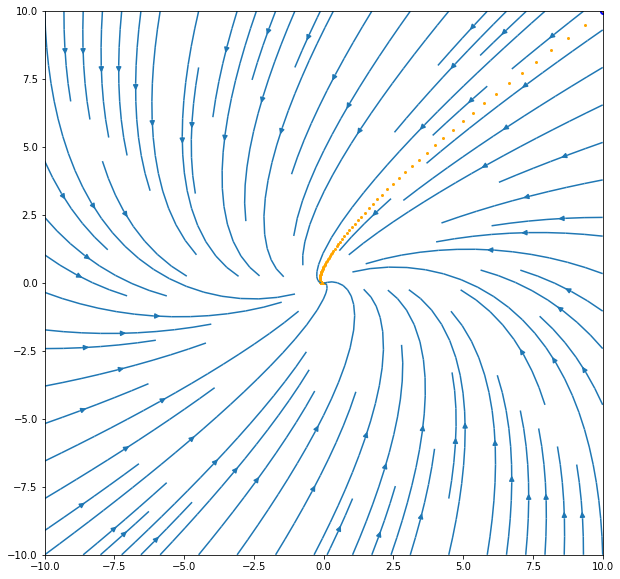

In [10]:
create_phase_portrait_matrix(A, title_suffix="unstable focus", display=False)
sol = solve_ivp(linear_approx, [0, 100], [10, 10], t_eval=np.linspace(0, 100, 1000), args=[A])
plt.scatter(10, 10, c='blue')
plt.scatter(sol.y[0,:],sol.y[1,:], c='orange', s=4)
plt.rcParams["figure.figsize"] = (14,14)
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.show()